# AI Agent Playing Game v0

In this notebook we load a simple version of our game (*game-v0*) in which a quantum circuit with a single random gate is generated. The aim of the game is to guess the outcome of a measurement performed at the end of the circuit. We instantiate and run a random agent and few RL agents from the stable-baselines library and we observe their results.

### Importing libraries

We start importing the main required libraries: OpenAI *gym* to run the game; *IPython.display* to print out our circuits.  

In [2]:
import gym

from IPython.display import display

### Importing the game

Next, we import the version of our game wrapped into the *gym* interface. The code for this version of the game is available at URL and it can be installed as explained in SETUP.

This version of the game implements a game environment that inherits from the *OpenAI gym* **Env** class. It implements four main methods: *__init__()* for setting up the game; *step()* computing the result of a single time-step of evolution of the environment; *reset()* restarting the game; *render()* displaying the game.

The game has been modeled with a *discrete state space* (an integer number between 0 and 5 identifies which of the six possible gates has been randomly added on the circuit) and a *discrete action space* (the two integer numbers 0 and 1 corresponds to the possible guesses of the agent). Since the game is fully observed, the state space corresponds to the observation space. A positive reward (+1) is returned for guessing correctly, a negative reward (-1) is returned for guessing wrong.

The code is available in the source file: URL.

In [ ]:
import qcoin

### Loading the game
We create the game enviroment:

In [3]:
env = gym.make('qcoin-v0')

And then we test the game running a single iteration of the game where the AI agent takes a random guess:

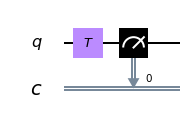

AI is guessing that the outcome will be 0
The guess is correct!


In [6]:
env.reset()
display(env.render())

for _ in range(1):
    guess = env.action_space.sample()
    print("AI is guessing that the outcome will be {0}".format(guess))
    obs, reward, done, info = env.step(guess)
    if(reward==1):
        print("The guess is correct!")
    else:
        print("The guess is wrong!")
        
env.close()

### Training a Reinforcement Learning Agent

Running a random agent on the game is not particularly interesting. We then turn to loading and running reinforcement learning agents that, starting from a random policy, would be able to learn to play the game in a sensible way. To do so, we rely on the library of agents provided by stable-baselines.

More information and examples on stable-baselines: https://github.com/hill-a/stable-baselines

### Training a PPO2 Agent

We consider instanting and training a PPO2 agent.

First of all we import the required modules: *DummyVecEnv* providing a wrapper for our environment as required by stable-baselines; *MlpPolicy* specifying a policy for our agent

In [4]:
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.common.policies import MlpPolicy
from stable_baselines import PPO2

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [5]:
env = DummyVecEnv([lambda: env])
PPO2model = PPO2(MlpPolicy, env, verbose=1)
PPO2model.learn(total_timesteps=10000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



-------------------------------------
| approxkl           | 8.309672e-05 |
| clipfrac           | 0.0          |
| explained_variance | -0.287       |
| fps                | 78           |
| n_updates          | 1            |
| policy_entropy     | 0.6930544    |
| policy_loss        | -0.001494581 |
| serial_timesteps   | 128          |
| time_elapsed       | 3.58e-06     |
| total_timesteps    | 128          |
| value_loss         | 0.60175395   |
-------------------------------------
---------------------------------------
| approxkl           | 0.000108649176 |
| clipfrac           | 0.0            |
| explained_variance | -0.0833        |
| fps                | 86             |
| n_updates          | 2              |
| policy_entropy     | 0.692

-------------------------------------
| approxkl           | 0.0011958777 |
| clipfrac           | 0.001953125  |
| explained_variance | 0.00474      |
| fps                | 83           |
| n_updates          | 10           |
| policy_entropy     | 0.46855655   |
| policy_loss        | -0.008418754 |
| serial_timesteps   | 1280         |
| time_elapsed       | 13           |
| total_timesteps    | 1280         |
| value_loss         | 0.48170447   |
-------------------------------------
-------------------------------------
| approxkl           | 0.0034434418 |
| clipfrac           | 0.0390625    |
| explained_variance | -0.00569     |
| fps                | 83           |
| n_updates          | 11           |
| policy_entropy     | 0.4041364    |
| policy_loss        | -0.020768259 |
| serial_timesteps   | 1408         |
| time_elapsed       | 14.5         |
| total_timesteps    | 1408         |
| value_loss         | 0.46804875   |
-------------------------------------
------------

---------------------------------------
| approxkl           | 1.4008025e-05  |
| clipfrac           | 0.0            |
| explained_variance | -0.027         |
| fps                | 83             |
| n_updates          | 27             |
| policy_entropy     | 0.08139556     |
| policy_loss        | -0.00042136712 |
| serial_timesteps   | 3456           |
| time_elapsed       | 42.5           |
| total_timesteps    | 3456           |
| value_loss         | 0.46894366     |
---------------------------------------
--------------------------------------
| approxkl           | 0.00027669914 |
| clipfrac           | 0.001953125   |
| explained_variance | 0.000356      |
| fps                | 81            |
| n_updates          | 28            |
| policy_entropy     | 0.0718555     |
| policy_loss        | -0.0024419203 |
| serial_timesteps   | 3584          |
| time_elapsed       | 44            |
| total_timesteps    | 3584          |
| value_loss         | 0.45155683    |
------------

---------------------------------------
| approxkl           | 1.9627338e-05  |
| clipfrac           | 0.0            |
| explained_variance | 0.0163         |
| fps                | 74             |
| n_updates          | 43             |
| policy_entropy     | 0.022420749    |
| policy_loss        | -0.00034862966 |
| serial_timesteps   | 5504           |
| time_elapsed       | 69.4           |
| total_timesteps    | 5504           |
| value_loss         | 0.45383006     |
---------------------------------------
--------------------------------------
| approxkl           | 2.6260584e-06 |
| clipfrac           | 0.0           |
| explained_variance | -0.00178      |
| fps                | 71            |
| n_updates          | 44            |
| policy_entropy     | 0.022885242   |
| policy_loss        | 8.375943e-05  |
| serial_timesteps   | 5632          |
| time_elapsed       | 71.1          |
| total_timesteps    | 5632          |
| value_loss         | 0.43131265    |
------------

--------------------------------------
| approxkl           | 3.896014e-11  |
| clipfrac           | 0.0           |
| explained_variance | -0.0441       |
| fps                | 72            |
| n_updates          | 59            |
| policy_entropy     | 0.020343615   |
| policy_loss        | -5.962793e-07 |
| serial_timesteps   | 7552          |
| time_elapsed       | 97.2          |
| total_timesteps    | 7552          |
| value_loss         | 0.4615866     |
--------------------------------------
--------------------------------------
| approxkl           | 2.9878734e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.0204       |
| fps                | 67            |
| n_updates          | 60            |
| policy_entropy     | 0.020265378   |
| policy_loss        | -0.0005239026 |
| serial_timesteps   | 7680          |
| time_elapsed       | 98.9          |
| total_timesteps    | 7680          |
| value_loss         | 0.48115486    |
-------------------------

--------------------------------------
| approxkl           | 2.3400976e-10 |
| clipfrac           | 0.0           |
| explained_variance | 0.0138        |
| fps                | 58            |
| n_updates          | 76            |
| policy_entropy     | 0.013143256   |
| policy_loss        | 1.5413389e-07 |
| serial_timesteps   | 9728          |
| time_elapsed       | 125           |
| total_timesteps    | 9728          |
| value_loss         | 0.43870324    |
--------------------------------------
--------------------------------------
| approxkl           | 4.7441637e-11 |
| clipfrac           | 0.0           |
| explained_variance | -0.0684       |
| fps                | 72            |
| n_updates          | 77            |
| policy_entropy     | 0.013770604   |
| policy_loss        | -4.452304e-07 |
| serial_timesteps   | 9856          |
| time_elapsed       | 128           |
| total_timesteps    | 9856          |
| value_loss         | 0.4782222     |
-------------------------

In [6]:
PPO2model.save('PPO2-qcoin-v1')

### Running AC3 agent

In [5]:
from stable_baselines import A2C

In [8]:
A2Cmodel = A2C(MlpPolicy, env, verbose=1)
A2Cmodel.learn(total_timesteps=10000)




Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
---------------------------------
| explained_variance | -0.162   |
| fps                | 23       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 1.12     |
---------------------------------
---------------------------------
| explained_variance | 0.191    |
| fps                | 82       |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 0.837    |
---------------------------------
---------------------------------
| explained_variance | 0.114    |
| fps                | 83       |
| nupdates           | 200      |
| policy_entropy     | 0.692    |
| total_timesteps    | 1000     |
| value_loss         | 0.913    |
---------------------------------
---------------------------------
| explained_variance | 0.0526

In [9]:
A2Cmodel.save('A2C-qcoin-v1')

### Running DQN agent

In [12]:
from stable_baselines import ACER

In [14]:
env = DummyVecEnv([lambda: env])
ACERmodel = ACER(MlpPolicy, env, verbose=1)
ACERmodel.learn(total_timesteps=10000)


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

----------------------------------
| avg_norm_adj        | 0.199    |
| avg_norm_g          | 2        |
| avg_norm_grads_f    | 1.83     |
| avg_norm_k          | 1.41     |
| avg_norm_k_dot_g    | 2        |
| entropy             | 14.6     |
| explained_variance  | 0.00269  |
| fps                 | 0        |
| loss                | 0.244    |
| loss_bc             | -0       |
| loss_f              | 0.14     |
| loss_policy         | 0.14     |
| loss_q              | 0.499    |
| mean_episode_length | 1        |
| mean_episode_reward | 0.2      |
| norm_grads          | 0.626    |
| norm_grads_policy   | 0.516    |
| norm_grads_q        | 0.355    |
| total_timesteps     | 0        |
---------------------------

In [15]:
ACERmodel.save('ACER-qcoin-v1')

### Comparing random agent and learned agents

In [17]:
import evaluation as ev

In [11]:
mean_reward, n_episode_rewards = ev.evaluate_model(PPO2model, env, num_steps=1000)
print('Mean reward: {0} ; Games: {1}'.format(mean_reward, n_episode_rewards))

Mean reward: 0.2 ; Games: 1001


In [12]:
mean_reward, n_episode_rewards = ev.evaluate_model(A2Cmodel, env, num_steps=1000)
print('Mean reward: {0} ; Games: {1}'.format(mean_reward, n_episode_rewards))

Mean reward: 0.2 ; Games: 1001


In [18]:
mean_reward, n_episode_rewards = ev.evaluate_model(ACERmodel, env, num_steps=1000)
print('Mean reward: {0} ; Games: {1}'.format(mean_reward, n_episode_rewards))

Mean reward: 0.3 ; Games: 1001


In [13]:
mean_reward, n_episode_rewards = ev.evaluate_random(gym.make('qcoin-v0'), num_steps=1000)
print('Mean reward: {0} ; Games: {1}'.format(mean_reward, n_episode_rewards))

Mean reward: 0.1 ; Games: 1001
